# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle / Purchasing power of English workers from the 16th to the 19th century

Le but de ce travail est de reproduire le [graphique](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png) de William Playfair qui montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Ce graphique est publié dans son [livre](https://books.google.fr/books?id=aQZGAQAAMAAJ&printsec=frontcover&hl=fr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) : "A Letter on Our Agricultural Distresses, Their Causes and Remedies".

Les données numériques brutes que William Playfair a utilisées ne sont malheureusement pas disponibles. Des valeurs obtenues par numérisation du graphe sont toutefois disponibles [ici](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html). Pour la suite de cette analyse, la [version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) sera utilisée.

---

The purpose of this work is to reproduce the [graphic](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week.png_of_Labour_by_the_Week.png_from_18_by_the_Week.png_from_18) which shows  the evolution of the wheat prize and average salaries from 1565 to 1821. This graph is published in his [book](https://books.google.fr/books?id=aQZGAQAAMAAJ&printsec=frontcover&hl=fr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false ): "A Letter on Our Agricultural Distresses, Their Causes and Remedies".
 
The raw data that William Playfair used is unfortunately not published. However, values obtained by digitizing the graph are available [here](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html). For the remainder of this analysis, the [CSV format version](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) will be used. 


In [1]:
# ensemble des bibliothèques à importer / set of libraries to import 
%matplotlib inline
import os
import urllib.request
import datetime 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator
import matplotlib.cm as cm
import pandas as pd

## Téléchargement des données / Download data

Afin de garder une trace des données qui ont été traitées, une copie locale du fichier a été réalisée. Le but de la manoeuvre était de permettre d'accéder aux données ultérieurement même si le lien initial de téléchargement des données est modifié ou supprimé. Cela permet également d'étudier le même set de donnée même si, par exemple, une nouvelle numérisation du graphique était réalisée.

Dans un premier temps, la présence de cette copie locale du fichier est vérifiée. Si aucun fichier n'est présent, une copie des données téléchargeable à l'adresse URL renseignée ci-dessous (`data_url`) est réalisée dans un fichier local (`fileName`) qui servira dans la suite des analyses. Ce fichier local est normalement transmis avec ce document computationnel (*data_william.csv*).

---

In order to keep track of the data that has been processed, a local copy of the file has been made. The purpose of the maneuver was to allow access to the data later even if the initial data download link is modified or deleted. This also makes it possible to study the same data set even if, for example, a new digitization of the graph was carried out.

First, the presence of this local copy of the file is checked. If no file is present, a copy of the downloadable data at the URL address given below (`data_url`) is made in a local file (` fileName`) which will be used in the rest of the analyses. This local file is normally transmitted with this computational document (*data_william.csv*). 


In [2]:
data_url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'

In [3]:
fileName = 'data_william.csv'
if not os.path.exists(fileName):
    print('FR: Aucun fichier local avec les données étudiées n\'est disponible. Un nouveau fichier est fabriqué à partir du lien donné')
    print('EN: No local file with the studied data is available. A new file is made from the given link')
    urllib.request.urlretrieve(data_url, fileName) 

Le fichier local peut à présent être ouvert. Celui-ci sera utilisé tout au long de cette étude.

La première colonne du fichier csv téléchargé correspond à l'ID. Cette colonne est dès lors passée comme index lors de son exportation (`pd.read_csv()`) grâce à l'ajout du paramètre suivant : `index_col=0`.

---

The local file can now be opened. This will be used throughout this study.

The first column of the downloaded csv file is the ID. This column is therefore passed as an index during its export (`pd.read_csv ()`) thanks to the addition of the following parameter: `index_col = 0`.

In [4]:
raw_data = pd.read_csv(fileName,index_col=0)
raw_data

Year  Wheat  Wages
1   1565   41.0   5.00
2   1570   45.0   5.05
3   1575   42.0   5.08
4   1580   49.0   5.12
5   1585   41.5   5.15
6   1590   47.0   5.25
7   1595   64.0   5.54
8   1600   27.0   5.61
9   1605   33.0   5.69
10  1610   32.0   5.78
11  1615   33.0   5.94
12  1620   35.0   6.01
13  1625   33.0   6.12
14  1630   45.0   6.22
15  1635   33.0   6.30
16  1640   39.0   6.37
17  1645   53.0   6.45
18  1650   42.0   6.50
19  1655   40.5   6.60
20  1660   46.5   6.75
21  1665   32.0   6.80
22  1670   37.0   6.90
23  1675   43.0   7.00
24  1680   35.0   7.30
25  1685   27.0   7.60
26  1690   40.0   8.00
27  1695   50.0   8.50
28  1700   30.0   9.00
29  1705   32.0  10.00
30  1710   44.0  11.00
31  1715   33.0  11.75
32  1720   29.0  12.50
33  1725   39.0  13.00
34  1730   26.0  13.30
35  1735   32.0  13.60
36  1740   27.0  14.00
37  1745   27.5  14.50
38  1750   31.0  15.00
39  1755   35.5  15.70
40  1760   31.0  16.50
41  1765   43.0  17.60
42  1770   47.0  18.50
43  1775   44.0  19.50
44  1780   46.0  21.00
45  1785   42.0  23.00
46  1790   47.5  25.50
47  1795   76.0  27.50
48  1800   79.0  28.50
49  1805   81.0  29.50
50  1810   99.0  30.00
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN

**Informations relatives aux données:**

Il s'agit d'une base de données avec 53 observations sur les 3 variables suivantes:

* *Year* = années espacées de 5 ans entre 1565 et 1821
* *Wheat* = prix du blé (shillings pour un quart de boisseau de blé)
* *Wages* = salaires hebdomadaires (shillings par semaine)

Notons néanmoins qu'aucune observation du salaire hebdomadaire n'est présente pour les années 1815,1820 et 1821.

*Remarques*

* Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
* Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
* Les salaires sont donnés en shillings par semaine.

---

**Data information:**

It is a database with 53 observations on the following 3 variables:

* *Year* = years spaced 5 years apart between 1565 and 1821
* *Wheat* = price of wheat (shillings per quarter)
* *Wages* = weekly wages (shillings per week)

It should be noted that no observation of weekly wages is present for the years 1815, 1820 and 1821. 

*Remarks*

* Until 1971, the pound sterling was divided into 20 shillings, and a shilling into 12 pence.
* The wheat price is given in shillings per quarter, a quarter being 15 British pounds or about 6,8 kg.
* Wages are given in shillings per week.

## Les données / the data

### Type des données présentes dans le tableau  / Type of data present in the array

Est-ce des entiers, des réels, des suites de caractères, des dates? / Are they integers , floats, strings, dates ? 

In [5]:
print (type(raw_data['Year'][1]),type(raw_data['Wheat'][1]),type(raw_data['Wages'][1]))

<class 'numpy.int64'> <class 'numpy.float64'> <class 'numpy.float64'>


**Analyse**

Le premier type de données (colonne: *Year*) est un nombre entier *(<class 'numpy.int64'>)*, les deux autres (colonnes: *Wheat* et *Wages*) sont des nombres réels *(<class 'numpy.float64'>)*.

Les dates ne sont donc pas considérées comme telles par **pandas** lors de la lecture du fichier csv. Afin que ces dates soient traitées correctement par **matplotlib** lors de l'affichage graphique, la bibliothèque **datetime** est utilisée. Celle-ci propose un format de date supporté par matplotlib. Les données sont stockées sous forme de dates comportant un jour, un mois et une année. Nous avons fixé le mois et le jour comme étant le premier jour de chaque année civil, soit le 1er janvier. La commande ressemble donc à ceci :  `datetime.date(année,mois,jours)` avec le mois et le jour fixé à 1. 

---

The first data type (column: *Year*) is an integer *(<class 'numpy.int64'>)*, the other two data type(columns: *Wheat* and *Wages*) are real numbers *(<class 'numpy.float64' >)*.

The dates are therefore not considered as such by **pandas** when reading the csv file. In order for these dates to be handled correctly by **matplotlib** when displaying graphically, the **datetime** library is used. This offers a date format supported by matplotlib. The data is stored in the form of dates comprising a day, a month and a year. We have set the month and day as the first day of each calendar year, which is January 1. So the command looks like this: `datetime.date (year, month, days)` with the month and the day set to 1. 

In [6]:
year=[datetime.date(raw_data['Year'][i],1,1)for i in range(1,len(raw_data['Year'])+1)]# car l'index choisi commence à 1 et pas 0
data = raw_data.assign(Year_date=year)

Les dates ainsi formées ont été ajoutée au dataframe grâce à la commande `.assign()`, dans une nouvelle colonne nommée *Year_date*.

Le type de données présentes dans cette colonne (*Year_date*) est à nouveau vérifié. Il s'agit bien d'un **datetime** *(<class'datetime.date'>)*

---
The dates formed were added to the dataframe using the `.assign ()` command, in a new column called *Year_date*. 

The type of data present in this column is verified. It is indeed a **datetime** *(<class'datetime.date '>)* 

In [7]:
print (type(data['Year_date'][1]))

<class 'datetime.date'>


### Calcul de l'intervalle entre deux données temporelles / Calculation of the interval between two temporal data 

Il est important de connaitre le nombre de jours exact compris entre deux dates de la base de données (`(year[j+1]-year[j]).days`). Cette durée permettra de fixer la largeur des bâtonnets dans le graphique correspondant. Certaines années étant bissextiles, le temps entre deux dates consécutives variera entre 1826 (si une année bissextile) et 1827 (si deux années bissextile) pour une période de 5 ans. Sachant qu'une année normale contient 365 jours et qu'une année bissectile (tous les 4 ans) en contient 366, nous obtenons bien $4*365+366 = 1826$ et $3*365+2*366 = 1827$. Ces nombres peuvent être comparés aux résultats obtenus ci-dessous afin de vérifier et valider le code utilisé. 

---

It is important to know the exact number of days between two dates in the database (`(year[j+1]-year[j]).days`). This duration will allow to set the width of the bars in the corresponding graph. Some years being leap years, the time between two consecutive dates will vary between 1826 (if a leap year) and 1827 (if two leap years) for a period of 5 years. Knowing that a normal year contains 365 days and that a leap year (every 4 years) contains 366, we get $4 * 365 + 366 = 1826$ and $3 * 365 + 2 * 366 = 1827$. These numbers can be compared to the results obtained below in order to verify and validate the code used. 

In [8]:
width=[(year[j+1]-year[j]).days for j in range(0,len(year)-1)]

In [9]:
for i,e in enumerate(width):
    if e != 1826 and e!=1827:
        print('FR: l\'intervalle',year[i+1],'à',year[i],'ne répond pas au critère')
        print('EN: the interval',year[i+1],'à',year[i],'doesn\'t meet the criteria')

FR: l'intervalle 1821-01-01 à 1820-01-01 ne répond pas au critère
EN: the interval 1821-01-01 à 1820-01-01 doesn't meet the criteria


**Analyses**

Un seul intervalle ne correspond pas à une période de 5 ans : entre 1820 et 1821. Ce qui est normal, cette période ne couvre qu'une seule année. Le calcul exécuté ci-dessus est dès lors validé et les résultats qui en résultent pourront servir dans la suite de l'étude. 

Enfin, entre 1565 et 1821, il n'y a que n-1 période de temps (n= nombre d'années). Cette observation est facilement visible avec la commande `len()`. Une période d'une année (nombre de jours de 1821) est dès lors ajoutée dans la variable *width*. En effet, vu que ce graphique présente l'évolution du prix du blé et du salaire moyen entre 1565 et 1821, l'année 1821 est simplement la dernière année de mesure renseignée dans les données.

---

Only one interval doesn't correspond to a period of 5 years: between 1820 and 1821. This is normal, this period covers only one year. The calculation carried out above is therefore validated and the resulting results can be used in the rest of the study.

Finally, between 1565 and 1821, there is only n-1 period of time (n = number of years). This observation is easily visible with the `len ()` command. A period of one year (number of days in 1821) is therefore added in the variable *width*. Indeed, this graph shows the evolution of the price of wheat and the average wage between 1565 and 1821. Year 1821 is simply the last measurement year entered in the data.

In [10]:
if len(data['Year_date'])!=len(width):
    print('Lenght of Year_date:',len(data['Year_date']))
    print('Lenght of width:',len(width))

Lenght of Year_date: 53
Lenght of width: 52


In [11]:
end=datetime.date(year[len(year)-1].year+1,1,1)
width.append((end-year[len(year)-1]).days)

Une nouvelle colonne est enfin ajoutée au dataframe *data* grâce à la commande suivante : `data.assign(nom de la colonne,données)`. Cette nouvelle colonne sera nommée : *period_width* et son type (vérifié ci-dessous) est un entier *(<class 'numpy.int64'>)*.

---

Finally, a new column is added to the dataframe *data* with the following command:` data.assign (name of the column, data)`. This new column will be named: *period_width* and its type (checked below) is an integer *(<class 'numpy.int64'>)*. 

In [12]:
data = data.assign(period_width=width)

In [13]:
print (type(data['period_width'][1]))

<class 'numpy.int64'>


## Graphique / Graph

![](chart_williams.png)

[By William Playfair (1759-1823) — Edward Tufte, The Visual Display of Quantitative Information, Graphics Press USA, 2001, 2e éd. (1re éd. 1983), 190 p., Domaine public](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png)

**Description du graphique**

L'axe des x :

* axe compris entre 1565 et 1830;
* graduations majeures en 1600 puis tous les 50 ans
* graduations mineures tous les 5 ans

L'axe des y :

* légende d'axe située à droite du graphique
* axe compris entre 0 et 100 shillings
* graduations majeures tous le 10 shillings
* graduations mineures tous les 5 shillings

Graphique en bâtonnets :

* en noir avec la couleur qui tend graduellement vers le blanc
* 5 ans = une même valeur de prix du blé (sauf pour 1820 et 1821)

Graphique linéaire:

* ligne rouge pour représenter le salaire par semaine d'un bon mécanicien
* coloration bleue en dessous de la ligne rouge jusqu'à 0 shillings
* les valeurs s'arrêtent en 1810, soit 11 ans avant le prix du blé

D'autres informations telles que les siècles ou les rois ne seront pas représentés sur le graphique présenté ci-dessous, cette information n'étant pas demandée pour cet exercice. 

La suite de ce document se base sur ces observations. Nous tenterons de les reproduire le plus fidèlement possible.

---

**Description of the graph**

The x-axis:

* axis between 1565 and 1830;
* majors graduations in 1600 then every 50-year
* minors graduations every 5 years

The y-axis:

* axis legend located to the right of the graph
* axis between 0 and 100 shillings
* majors graduations every 10 shillings
* minors graduations every 5 shillings

Bar graphic:

* in black with the color tending towards white
* 5 years = the same price of wheat (except for 1820 and 1821)

Line graph:

* red line to represent the weekly salary of a good mechanic
* blue coloring below the red line up to 0 shillings
* the values stop in 1810, i.e. 11 years before the price of wheat

Other information such as centuries or kings will not be represented on the graph presented below, this information is not requested for this exercise.

The remainder of this document is based on these observations. We will try to reproduce them as faithfully as possible. 

### Préliminaire: Graphique séparé des deux parties du graph / Preliminary:  separated graph from the two parts of the graph 

#### Graphique en bâtonnets

Celui-ci est réalisé avec `matplotlib.pyplot.bar` avec les paramètres suivants:

* `x=` les dates (*Year_date*). Pour que celles-ci soient bien reconnues comme telles par matplotlib, nous ajoutons la commande suivante `xaxis_date()` dans la suite du code.
* `y=` prix du blé (*Wheat*)
* `align='edge'` pour faire partir l'épaisseur de chaque bâtonnet depuis la limite gauche (et pas au centre vu que nous avons choisi le 1 janvier, qui est le début de chaque année et non le centre)
* `width=` le temps entre deux dates calculées ci-dessus (*period_width*). Ce qui correspond à l'épaisseur de chaque batonnet.

Nous limitons également le graphique en x (`set_xlim`) de 1565 à 1830 et en y (`set_ylim`) de 0 à 100, comme c'est le cas dans le graphique d'origine.

Dans cette première version du graphique, nous terminons en labélisant les axes x (`set_xlabel`) et y (`set_ylabel`).

---

This is done with `matplotlib.pyplot.bar` with the following parameters:

* `x =` the dates (*Year_date*). So that these are well recognized as such by matplotlib, we add the following command `xaxis_date ()` in the rest of the code.
* `y =` wheat price (*Wheat*)
* `align = 'edge'` to make the thickness of each stick start from the left limit (and not center since we have chosen January 1, which is the start of each year and not the center)
* `width =` the time between two dates calculated above (*period_width*). This corresponds to the thickness of each stick.

We also limit the x (`set_xlim`) graph from 1565 to 1830 and the y (` set_ylim`) graph from 0 to 100, as in the original graph.

In this first version of the graph, we end by labelling the x (`set_xlabel`) and y (`set_ylabel`) axes. 

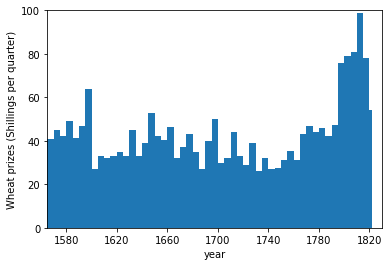

In [14]:
ax1 = plt.subplot(111)

ax1.bar(data['Year_date'].values,data['Wheat'],align='edge',width=data['period_width'])
ax1.xaxis_date()

ax1.set_ylim(0,100)
ax1.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax1.set_xlabel('year')
ax1.set_ylabel('Wheat prizes (Shillings per quarter)')

plt.show()

Nous pouvons ensuite améliorer le rendu de ce graphique afin de se rapprocher du rendu initial

1. Graduation de l'axe à droite et à gauche avec `tick_params(axis='y', which='both', labelleft='on', labelright='on')`
2. Label de l'axe y à droite `yaxis.set_label_position('right')`
3. Graduations majeures et mineures :
    * 10 shillings entre chaque graduation majeure : `yaxis.set_major_locator(MultipleLocator(10))`
    * 50 ans entre chaque graduation majeure : `xaxis.set_major_locator(YearLocator(50))` 
    * 5 ans entre les graduations mineures : `xaxis.set_minor_locator(YearLocator(5))` 
    * 5 shillings entre chaque graduation mineure : `ax1.yaxis.set_minor_locator(MultipleLocator(5))` 
4. Grille `grid()` avec les paramètres suivants : 
    * graduations majeures ou mineures visibles: `which=`'major' ou 'minor' 
    * axes concernés (x, y, x et y) :`axis=` 'x','y' ou 'both' 
    * style des lignes de graduations :`linestyle=`'--'ou'-'. Il est aussi possible de jouer sur les épaisseurs des lignes
    * couleur des lignes de graduations `color='k'` (ligne noire)
  
---

We can then improve the rendering of this graph to get closer to the initial rendering.

1. Graduation of the axis to the right and to the left with `tick_params (axis = 'y', which = 'both', labelleft = 'on', labelright = 'on')`
2. Label of the y-axis on the right `yaxis.set_label_position ('right')`
3. Majors and minors graduations:
    * 10 shillings between each major graduation: `yaxis.set_major_locator (MultipleLocator (10))`
    * 50 years between each major graduation: `xaxis.set_major_locator (YearLocator (50))`
    * 5 years between minors graduations: `xaxis.set_minor_locator (YearLocator (5))`
    * 5 shillings between each minor graduation: `ax1.yaxis.set_minor_locator (MultipleLocator (5))`
4. Grid `grid ()` with the following parameters:
    * majors or minors graduations visibles: `which =` 'major' or 'minor'
    * concerned axes (x, y, x and y): ` axis = ` 'x','y' or 'both'
    * style of the lines of graduations: `linestyle =` '-' or '-'. It is also possible to vary the thickness of the lines
    * color of the graduations lines `color = 'k'` (black line) 

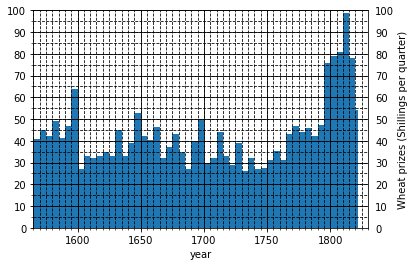

In [15]:
ax1 = plt.subplot(111)

ax1.bar(data['Year_date'].values,data['Wheat'],align='edge',width=data['period_width'])
ax1.xaxis_date()

ax1.set_ylim(0,100)
ax1.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax1.set_xlabel('year')
ax1.set_ylabel('Wheat prizes (Shillings per quarter)')

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(YearLocator(50))
ax1.xaxis.set_minor_locator(YearLocator(5))
ax1.grid(which='major',axis= 'both',linestyle='-',color='k')
ax1.grid(which='minor',axis= 'both',linestyle='--',color='k')

ax1.tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax1.yaxis.set_label_position('right')

plt.show()

Enfin, afin de coller au mieux au graphique d'origine, nous ajoutons une couleur dégradée pour chaque batonnet grâce à la fonction `imshow`. Pour se faire,nous créons une fonction `def gradientbars()` qui va permettre de:

* créer une image, c'est-à-dire un raster 2D régulier `np.atleast_2d()`.
* supprimer les éventuelles couleurs déjà présentes sur les bâtonnets du graphique `bar.set_facecolor('none')`;
* identifier la zone à colorier de façon dégradée qui sera utile dans les paramètres de `imshow`: `extent=[x,x+w,y_base,y+h]`. Dans cette expression:
   * x et y sont obtenu à partir du graphique en bâtonnets ( date= *Year_date*, niveau de base=0): `bar.get_xy()`
   * w et h sont obtenu à partir du graphique en bâtonnets (largeur= *period_width*, hauteur= *Wheat*) : `bar.get_width(), bar.get_height()`
   * y_base est fixé à 15, car sur le graphique d'origine les zones coloriées en noir ne dépassent pas cette limite.
   
* recoloriser la zone grâce à la fonction `imshow()` en :
   * gardant les axes du graphique. L'aspect est ajusté pour que les données tiennent dans les axes: `aspect='auto'`
   * choisissant la profondeur du graphique (utile pour la superposition des graphiques):  `zorder=`
   * choisissant le dégradé souhaité, ici dégradé de noir. `cmap=cm.gist_gray`
   
---

Finally, in order to best stick to the original graph, we add a gradient color for each stick thanks to function `imshow`. To do so, we create a `def gradientbars ()` function which will allow:

* create an image, i.e. a regular 2D raster `np.atleast_2d ()`.
* remove any colors already present on the sticks from the `bar.set_facecolor ('none')` graph;
* identify the area of color in which a degraded color will be useful in the parameters of `imshow`:` extent = [x, x + w, y_base, y + h] `. In this expression:
   * x and y are obtained from the bar graph (date = *Year_date*, base level = 0): `bar.get_xy ()`
   * w and h are obtained from the bar graph (width = *period_width*, height = *Wheat*): `bar.get_width (), bar.get_height ()`
   * y_base is fixed at 15, because on the original graph the areas colored in black do not exceed this limit.
   
* recolorized the area using the function `imshow ()` by:
   * keeping the axes of the graph. The aspect is adjusted so that the data fits in the axes: `aspect = 'auto'`
   * choosing the depth of the graph (useful for overlaying graphs) `zorder =`
   * choosing the desired gradient, here gradient of black: `cmap = cm.gist_gray` 

In [16]:
def gradientbars(bars,y_base,zorder):
    grad = np.atleast_2d(np.linspace(0,1,2**10)).T
    ax = bars[0].axes
    for bar in bars:
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y_base,y+h], aspect='auto', zorder=zorder,cmap=cm.gist_gray)

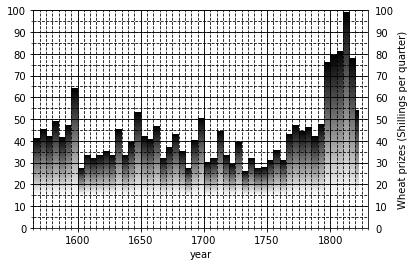

In [17]:
ax1 = plt.subplot(111)

bar=ax1.bar(data['Year_date'].values,data['Wheat'],align='edge',width=data['period_width'])
gradientbars(bar,y_base=15,zorder=0) 
ax1.xaxis_date()

ax1.set_ylim(0,100)
ax1.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax1.set_xlabel('year')
ax1.set_ylabel('Wheat prizes (Shillings per quarter)')

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(YearLocator(50))
ax1.xaxis.set_minor_locator(YearLocator(5))
ax1.grid(which='major',axis= 'both',linestyle='-',color='k')
ax1.grid(which='minor',axis= 'both',linestyle='--',color='k')

ax1.tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax1.yaxis.set_label_position('right')

plt.show()

#### Graphique des salaires des ouvriers / Worker wages graph 

Plusieurs points décrits ci-dessus peuvent être repris comme:

* les graduations
* les limites du graphique
* les labels des axes

Par contre, les graphiques eux-mêmes sont différents. Nous réalisons en réalité deux graphiques superposés. Le premier en rouge est une simple courbe, le deuxième en bleu est une surface. 

1. En rouge : une courbe représentant le salaire au cours du temps. Nous utilisons la fonction `plt.plot()` de matplotlib.pyplot avec comme paramètres:
    * `x =` *Year_date*
    * `y=` *Wages*
    * `color= 'red'`, colorie la courbe en rouge
    * `zorder=` qui permet de choisir le niveau du graphique lorsqu'il y a plusieurs graphiques ou inscriptions à superposer

2. En bleu clair: une surface située en dessous de la courbe rouge (comme dans le graphique initial): utilisation de la fonction `plt.fill_between()`avec :
    * `x =` *Year_date*
    * `y=` *Wages*
    * `facecolor= 'lightblue'`, colorie la surface en bleu clair

3. Nous ajoutons enfin un texte sur le graphique au-dessus de la ligne rouge grâce à `plt.text()` avec comme paramètres:
    *  x et y : position de départ du texte
    * `fontsize=8` : taille du texte
    * `rotation = 2` : rotation nécessaire pour suivre la courbe
    * `bbox=dict(facecolor='white',edgecolor='none', alpha=0.5)`:une fond clair (blanc) pour permettre une meilleure lecture du texte
    * `zorder=2` qui permet de choisir le niveau du graphique lorsqu'il y a plusieurs graphiques ou inscriptions à superposer
    
    ---
    
Several points described above can be repeated as:

* graduations
* the limits of the graphic
* axis labels

However, the graphics themselves are different. We are actually making two superimposed graphics. The first in red is a simple curve, the second in blue is a surface.

1. In red: a curve representing the salary over time. We use the `plt.plot ()` function of matplotlib.pyplot with as parameters:
    * `x =` *Year_date*
    * `y =` *Wages*
    * `color = 'red'`, color the curve in red
    * `zorder =` which allows to choose the level of the graph when there are several graphs or inscriptions to be added

2. In light blue: a surface located below the red curve (as in the initial graph): use of `plt.fill_between ()` function with:
    * `x =` *Year_date*
    * `y =` *Wages*
    * `facecolor = 'lightblue'`, color the surface light blue

3. We finally add a text on the graphic above the red line thanks to `plt.text ()` function with as parameters:
    * x and y: starting position of the text
    * `fontsize = 8`: text size
    * `rotation = 2`: rotation necessary to follow the curve
    * `bbox = dict (facecolor = 'white', edgecolor = 'none', alpha = 0.5)`: a light background (white) to allow better reading of the text
    * `zorder = 2` which allows to choose the level of the graph when there are several graphs or inscriptions to be added 

In [ ]:
ax2 = plt.subplot(111)
ax2.fill_between(data['Year_date'].values,data['Wages'],facecolor='lightblue')
ax2.plot(data['Year_date'].values,data['Wages'],'r',zorder=3)
ax2.xaxis_date()

ax2.set_ylim(0,100)
ax2.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax2.xaxis.set_major_locator(YearLocator(50))
ax2.xaxis.set_minor_locator(YearLocator(5))
ax2.grid(which='major',axis= 'both',linestyle='-',color='k')
ax2.grid(which='minor',axis= 'both',linestyle='--',color='k')

ax2.tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax2.yaxis.set_label_position('right')

ax2.set_xlabel('year')
ax2.set_ylabel('Wages (Shillings per week)')
ax2.text(data['Year_date'][1],data['Wages'][1]+4, ' Weekly Wages of a Good Mechanic',fontsize=8,rotation = 2,bbox=dict(facecolor='white',edgecolor='none', alpha=0.5),zorder=2)
plt.show()

Notons que dans les données, les dernières valeurs du tableau sont absente `NaN`, ce qui ne pose pas de problème dans le graphique, ces valeurs ne sont simplement pas utilisées.

---

Note that in the data, the last values of the array are absent `NaN`, which does not pose a problem in the graph, these values are simply not used. 

### Question 1: reproduire le graphique de William Playfair / Question 1: reproduce the graphic by William Playfair 

Dans cette partie, il nous était demandé de reproduire le graphe de Playfair à partir des données numériques. Représenter, comme Playfair, le prix du blé par des barres et les salaires par une surface bleue délimitée par une courbe rouge. Superposer les deux de la même façon dans un seul graphique. Le style du graphique pourra rester différent par rapport à l'original, mais l'impression globale devrait être la même.

Pour ce faire, il suffit de recopier les codes préalablement établis (ci-dessus) et de les mettre sur un graphique unique. Il suffit d'utiliser ax1 pour les deux codes ci-dessus: entrée [17] et [18]. Nous avons simplement adapté les légendes d'axes afin qu'elles correspondent à celles du graphique d'origine.

---

In this part, we were asked to reproduce Playfair's graph from the numerical data. To like Playfair, represent the wheat price by bars and the salaries by a blue surface delimited by a red curve. Superpose them in a single graphic. To apart from these criteria, the style of the graphic may differ from the original, but the overall impression it leaves should be the same.

To do so, simply copy the previously established codes (above) and put them on a single graph. Just use ax1 for the two codes above: input [17] and [18]. We simply adapted the axis legends so that they correspond to those of the original graphic. 

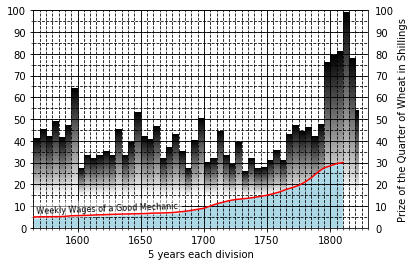

In [19]:
ax1 = plt.subplot(111)

bar=ax1.bar(data['Year_date'].values,data['Wheat'],align='edge',width=data['period_width'])
gradientbars(bar,y_base=15,zorder=0)
ax1.fill_between(data['Year_date'].values,data['Wages'],facecolor='lightblue')
ax1.plot(data['Year_date'].values,data['Wages'],'r',zorder=3)
ax1.xaxis_date()

ax1.set_ylim(0,100)
ax1.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax1.set_xlabel('5 years each division') 
ax1.set_ylabel('Prize of the Quarter of Wheat in Shillings') 

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(YearLocator(50))
ax1.xaxis.set_minor_locator(YearLocator(5))
ax1.grid(which='major',axis= 'both',linestyle='-',color='k')
ax1.grid(which='minor',axis= 'both',linestyle='--',color='k')

ax1.tick_params(axis='y', which='both', labelleft=True, labelright=True)
ax1.yaxis.set_label_position('right')
ax1.text(data['Year_date'][1],data['Wages'][1]+4, ' Weekly Wages of a Good Mechanic',fontsize=8,rotation = 2,bbox=dict(facecolor='white',edgecolor='none', alpha=0.5),zorder=2)

plt.show()

### Question 2 : Ajuster le graphique en doublant l'axe des Y (prix)  /  Question 2: Adjust the chart by doubling the Y-axis (price) 

Dans cette partie, il nous était demandé d' améliorer la présentation de ces données. Pour commencer, Playfair a combiné les deux quantités dans un même graphique en simplifiant les unités "shillings par quart de boisseau de blé" et "shillings par semaine" à un simple "shillings", ce qui aujourd'hui n'est plus admissible. Utiliser deux ordonnées différentes, une à gauche et une à droite, et indiquer les unités correctes. À cette occasion, ne pas hésiter à proposer d'autres représentations que des barres et des surfaces/courbes pour les deux jeux de données si ceci vous paraît judicieux.

Pour ce faire, nous avons simplement dédoublé l'axe des y en gardant le même axe des x: `ax2 = ax1.twinx()`. Les lignes de codes décrites en entrée [17] sont dès lors liées à ax1 et en entrée [18] liées à ax2. Nous avons évidemment supprimé les fonctions `ax1.tick_params(axis='y', which='both'labelleft=True, labelright=True)` et `ax1.yaxis.set_label_position('right')`
permettant respectivement le dédoublement de l'axe des y et le positionnement de la légende de l'axe y à droite du graphique. 

Finalement, nous avons choisi d'ajouter des couleurs aux axes pour plus de clarté. Le graphique du prix du blé en noir et le  graphique des salaires en rouge : `ax2.tick_params(axis='y', colors='r')`. Pour simplifier la compréhension, la zone située sous la ligne rouge a également été coloriée en rouge (et non en bleu clair). 

---

In this part we were asked to improve the presentation of the data. For a start, Playfair has combined two quantities in a single graph by simplifying the units "shillings per quarter" and "shillings per week" to a plain "shillings", something that is no longer acceptable today. Use two different ordinate axes, one on the left and one on the right, and label them with the correct units. At this occasion, don't hesitate to use representations different from bars and curve-delimited surfaces for the two datasets if you consider this pertinent.

To do so, we simply split the y-axis while keeping the same x-axis: `ax2 = ax1.twinx ()`. The lines of codes described in input [17] are therefore linked to ax1 and in input [18] linked to ax2. We obviously removed the functions `ax1.tick_params (axis = 'y', which = 'both'labelleft = True, labelright = True)` and `ax1.yaxis.set_label_position (' right ')`
respectively allowing the doubling of the y axis and the positioning of the y axis legend to the right of the graph. 

Finally, we chose to add colors to the axes for more clarity. The Wheat graph in black and the Wages graph in red: `ax2.tick_params (axis = 'y', colors = 'r')`. To make it easier to understand, the area below the red line has also been colored red (and not light blue). 

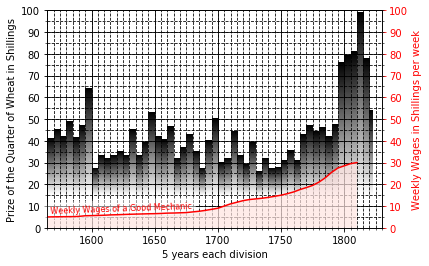

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bar=ax1.bar(data['Year_date'].values,data['Wheat'],align='edge',width=data['period_width'])
gradientbars(bar,y_base=15,zorder=0)
ax2.fill_between(data['Year_date'].values,data['Wages'],facecolor='mistyrose',alpha=0.7)
ax2.plot(data['Year_date'].values,data['Wages'],'r')
ax1.xaxis_date()

ax1.set_ylim(0,100)
ax2.set_ylim(0,100)
ax1.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax1.set_xlabel('5 years each division') 
ax1.set_ylabel('Prize of the Quarter of Wheat in Shillings')
ax2.set_ylabel('Weekly Wages in Shillings per week',color='red')

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(YearLocator(50))
ax1.xaxis.set_minor_locator(YearLocator(5))
ax1.grid(which='major',axis= 'both',linestyle='-',color='k')
ax1.grid(which='minor',axis= 'both',linestyle='--',color='k')
ax2.tick_params(axis='y', colors='r')
ax2.text(data['Year_date'][1],data['Wages'][1]+4, ' Weekly Wages of a Good Mechanic',fontsize=8,rotation = 2,bbox=dict(facecolor='white',edgecolor='none', alpha=0.5),zorder=1,color='r')
plt.show()

### Question 3 a : Représenter la quantité de blé que chaque ouvrier peut acheter avec son salaire moyen par semaine  /  Question 3 a: Represent the quantity of wheat that each worker can buy with his average weekly wage 

Dans cette partie, il nous était demandé d' essayer de mieux faire ressortir que le pouvoir d'achat des ouvriers avait augmenté au cours du temps (objectif de l'auteur d'origine). Pour cela, il nous demande de faire une représentation graphique du pouvoir d'achat au cours du temps, définie comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire.

Pour ce faire, nous avons commencé par calculer la quantité de blé que chaque ouvrier peut acheter avec son salaire moyen par semaine. Pour connaitre la quantité de blé (en kg), il suffit de diviser le salaire hebdomadaire par le prix du blé ( variable *quantity*) multiplié par le poids du blé contenu dans un boisseau, soit 6.8 kg ( variable *weight*).  

---

In this part we were asked to "Try to make stand out better the workers' purchasing power had increased over time (original author's goal) . Make a plot of the purchasing power, defined as the quantity of wheat a worker can buy with a weekly salary, as a function of time."

To do this, we started by calculating the amount of wheat that each worker can buy with his average weekly wage. To know the quantity of wheat (in kg), all you have to do is divide the weekly wage by the price of wheat (variable *quantity*) multiplied by the weight of the wheat, i.e. 6.8 kg ( variable *weight*). 

In [21]:
quantity=data['Wages']/ data['Wheat']
weight=quantity*6.8

Nous pouvons ensuite réaliser une courbe représentant ces poids en fonction du temps à l'aide de `plt.plot()`. Nous avons adapté les limites en y du graphique pour qu'elles correspondent à ce nouveau set de données `ax3.set_ylim(0,4)` et changer la légende de l'axe y.

---

We can then make a curve representing these weights as a function of time using `plt.plot ()`. We have adapted the y limits of the graph to match this new data set `ax3.set_ylim (0,4)` and changed the legend of the y axis. 

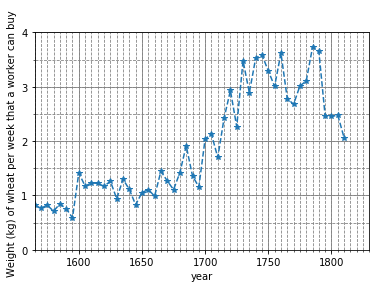

In [22]:
ax3 = plt.subplot(111)
ax3.plot(year,weight,'*--')
ax3.xaxis_date()

ax3.yaxis.set_major_locator(MultipleLocator(1))
ax3.yaxis.set_minor_locator(MultipleLocator(0.5))
ax3.xaxis.set_major_locator(YearLocator(50))
ax3.xaxis.set_minor_locator(YearLocator(5))
ax3.grid(which='major',axis= 'both',linestyle='-',color='grey')
ax3.grid(which='minor',axis= 'both',linestyle='--',color='grey')

ax3.set_ylim(0,4)
ax3.set_xlim(datetime.date(1565,1,1),datetime.date(1830,1,1))

ax3.set_xlabel('year')
ax3.set_ylabel('Weight (kg) of wheat per week that a worker can buy ')
plt.show()

### Question 3 b : Représenter le salaire moyen en fonction du prix du blé

Il nous était aussi demandé de montrer, dans un autre graphique, les deux quantités (prix du blé, salaire) sur deux axes différents, sans l'axe du temps. Trouver une autre façon d'indiquer la progression du temps dans ce graphique.

Pour ce faire, il suffit de mettre le prix du blé sur l'axe des x et le salaire moyen sur l'axe des y dans un graphique du type `plt.scatter()` et de changer les axes et les limites du graphique pour s'adapter aux nouvelles données représentées. 

La fonction `plt.scatter()` permet de représenter 3 variables différentes sur un même graphique:  aux x et y traditionnels s'ajoute une troisième variable c.  La couleur des points représentés sur le graphique peut alors varier en fonction de cette troisième variable. Nous avons dès lors représenté le temps par cette dernière variable. Nous avons fixé la taille des points avec le paramètre `s=50` et choisi l'échelle de couleur `cmap=cm.viridis`. Enfin, nous avons ajouté une légende de l'échelle de couleur au graphique grâce à `plt.colorbar()` et choisi d'orthonormé les axes du graphique grâce à `plt.gca().set_aspect('equal', adjustable='box')` afin de mieux visualiser le rapport entre x et y.  


---

It was also requested to show, in another plot,  the two quantities (wheat price, salary) on two different axes, without an explicit time axis. Find another way to show the advancement of time in this plot.

To do this, simply put the price of wheat on the x-axis and the average wage on the y-axis in a graph like `plt.scatter()` and change the axes and limits of the graph to adapt to the new data represented.

The `plt.scatter()` function is used to represent 3 different variables on the same graph: to the traditional x and y, a third variable c is added. The color of the points represented on the graph can then vary according to this third variable. We have therefore represented time by this last variable. We fixed the size of the points with the parameter `s = 50` and chose the color scale` cmap = cm.viridis`. Finally, we added a color scale legend to the graph thanks to `plt.colorbar()` and chose to orthonormalize the axes of the graphs thanks to `plt.gca().set_aspect ('equal', adjustable = 'box')` to better visualize the relationship between x and y. 

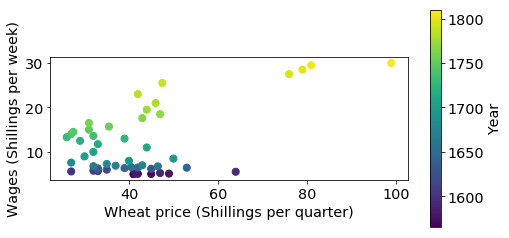

In [48]:
plt.figure()
color_year=plt.scatter(x=data['Wheat'], y=data['Wages'],c=data['Year'], s=50,cmap=cm.viridis)
cbar=plt.colorbar(color_year)
cbar.set_label('Year')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Wheat price (Shillings per quarter)')
plt.ylabel('Wages (Shillings per week)')
plt.show()

Malgré l'utilisation d'axes orthonormés, il ne nous semblait  pas évident d'observer l'évolution des deux variables l'une par rapport à l'autre et donc l'évolution du pouvoir d'achat des ouvriers. Nous avons donc choisi d'ajouter des lignes représentant le rapport du salaire des ouvriers sur le prix du blé (*Wages*/ *Wheat*) pour différentes valeurs de 0.1 à 1 par pas de 0.1 en:

* définissant cent points allant de 0 à 100 afin de dessiner les courbes `a_x=np.arange(0,100,1)`
* définissant les pentes recherchées: `a_p=np.arange(0.1,1,0.1)`
* réalisant un graphique (`plt.plot()`) avec `x=`a,`y=`a_p[i]*a, des lignes en pointillé `linestyle=`'--' et de couleur grise `color=`'grey'
* en ajoutant un texte donnant la valeur du ratio représenté : `plt.text(position x,position y,texte,paramètres,rotation)`
    * avec comme paramètres des instructions pour faire tourner le texte à partir du coin inférieur gauche:`{'ha': 'left', 'va': 'bottom'}`
    * avec une rotation en degré calculée à partir de la pente de la droite (arctangente de la pente, basé sur les formules trigonométrique dans un triangle rectange):`180*np.arctan(a_p[i])/np.pi`
    
---

Despite the use of orthonormal axes, it did not seem obvious to us to observe the evolution of the two variables in relation to each other and therefore the evolution of the purchasing power of workers. We have therefore chosen to add lines representing the ratio of workers'wages to the price of wheat (*Wages* / *Wheat*) for different values from 0.1 to 1 in steps of 0.1 in:

* defining hundred points going from 0 to 100 in order to draw the curves `a_x = np.arange (0,100,1)`
* defining the slopes sought: `a_p = np.arange (0.1,1,0.1)`
* making a graph (`plt.plot ()`) with `x=` a, `y=` a_p[i]*a, dotted linestyle `linestyle=` '--', grey color `color=`'grey'
* by adding a text giving the value of the ratio represented: `plt.text (position x, position y, text, parameters, rotation)`
    * with instruction parameters to rotate the text from the lower left corner: `{'ha': 'left', 'va': 'bottom'}`
    * with a rotation in degree calculated from the slope of the line (arctangent of the slope, based on trigonometry in a right triangle): `180 * np.arctan (a_p [i]) / np.pi` 

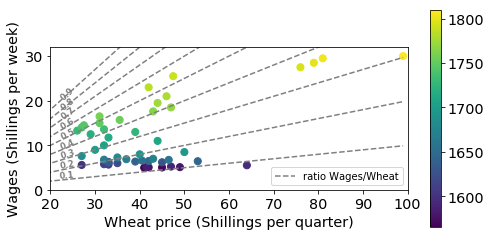

In [49]:
## FR: instructions pour avoir un graphique plus lisible (taille du graphique, taille du texte)
## EN: instructions to have a more readable graphic (size of the graphic, size of the text) 
plt.figure()
params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

x=plt.scatter(x=data['Wheat'], y=data['Wages'],c=data['Year'], s=50)
plt.colorbar(x)

a=np.arange(0,100,1)
a_p=np.arange(0.1,1,0.1)
for i in range (0,9):
    plt.plot(a,a_p[i]*a,'--',color='grey')
    plt.text(22,22*a_p[i],str(np.around(a_p[i],1)),{'ha': 'left', 'va': 'bottom'},rotation=180*np.arctan(a_p[i])/np.pi,color='grey',fontsize='small',fontweight='bold')

plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(20,100)
plt.ylim(0,32)

plt.xlabel('Wheat price (Shillings per quarter)')
plt.ylabel('Wages (Shillings per week)')
plt.legend(['ratio Wages/Wheat'])
plt.show()

### Conclusion

**Quelle représentation des données vous paraît la plus claire ? Which data representation seems clearest to you?**

L'ajout des courbes de ratio sur le graphique représentant le salaire en fonction du prix du blé permet déjà une meilleure visibilité de l'évolution du pouvoir d'achat des travailleurs à cette période toutefois, le graphique précédent (poids de blé qu'un ouvrier peut acheter en fonction du temps) semble représenter les choses de façon beaucoup plus visuelle et intuitive pour le lecteur. Elle serait donc à privilégier pour montrer l'évolution du pouvoir d'achat des travailleurs entre 1565 et 1821. Il est d'ailleure important de noter que ce pouvoir d'achat n'est pas stable et après une tendance à l'augmentation, rediminue à partir de la seconde moitié du 16ème siècle. 

---

The addition of the ratio curves to the graph representing the wage as a function of the price of wheat already allows better visibility of the evolution of the purchasing power of workers during this period, however, the previous graph (weight of wheat than a worker can buy over time) seems to represent things much more visually and intuitively to the reader. It would therefore be preferable to show the evolution of the purchasing power of workers between 1565 and 1821. It is also important to note that this purchasing power is not stable and after an increasing trend, decreases from the second half of the 16th century. 